In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


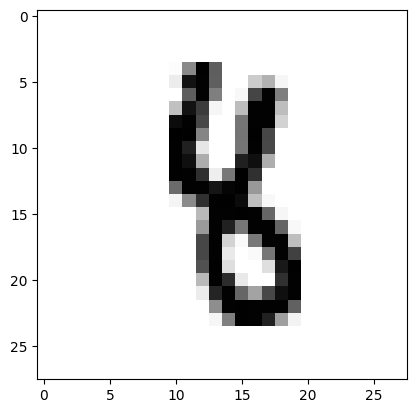

In [7]:
plt.imshow(X_train_full[7000],cmap='binary')

In [14]:
#unit scaling
X_valid,X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
X_test = X_test/255.

In [8]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name='inpuylayer'),
          tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer-1'),
          tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer-2'),
          tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]

In [9]:
model = tf.keras.models.Sequential(LAYERS)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inpuylayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer-1 (Dense)       (None, 300)               235500    
                                                                 
 hiddenlayer-2 (Dense)       (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'Adam'
METRICS = ['accuracy']

In [13]:
model.compile(optimizer=OPTIMIZER,loss=LOSS,metrics=METRICS)

In [16]:
model_history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 12s 6ms/step - loss: 0.2137 - accuracy: 0.9360 - val_loss: 0.1002 - val_accuracy: 0.9686
Epoch 2/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0882 - accuracy: 0.9721 - val_loss: 0.0814 - val_accuracy: 0.9734
Epoch 3/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0791 - val_accuracy: 0.9774
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0875 - val_accuracy: 0.9760
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0337 - accuracy: 0.9886 - val_loss: 0.0756 - val_accuracy: 0.9784


In [20]:
import time
import os
def save_model(model_dir='/saved_models/'):
  os.makedirs(model_dir,exist_ok=True)
  file_name = time.strftime('Model_%Y_%m_%d_%H_%M_%S_.h5')
  model_path = os.path.join(model_dir,file_name)
  print('Your model will be saved at the following location\n',{model_path})
  return model_path

In [21]:
model.save(save_model())

Your model will be saved at the following location
 {'/saved_models/Model_2024_03_12_10_40_52_.h5'}
